# Algorithm Performance Data Analysis - Run 4

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 70 | 0.00001| 
| max | 90 | 0.00100 | 
| step| 10 | 0.00001 | 

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data

## Run4 
data = pd.read_csv('IndividualCompressionData_since_test_20231102_191808.csv')

In [2]:
# Inspect the data
data

SN                TestID      FileName  OriginalFileSize  \
0       1  test_20231102_191808  10404007.png            502730   
1       2  test_20231102_191808   1254659.png            342646   
2       3  test_20231102_191808  10188041.png            221231   
3       4  test_20231102_191808  10287332.png            216980   
4       5  test_20231102_191808  11610969.png            368720   
...    ..                   ...           ...               ...   
20995   6  test_20231102_193558  10350842.png            212614   
20996   7  test_20231102_193558  10863862.png            317432   
20997   8  test_20231102_193558  11382381.png            312486   
20998   9  test_20231102_193558  11079715.png            443815   
20999  10  test_20231102_193558  11551286.png            271883   

       CompressedBinSize  FileSizeDifference  CompressionRate  \
0                 211424              291306         0.579448   
1                 207464              135182         0.394524   
2                  31951              189280         0.855576   
3                  30774              186206         0.858171   
4                 122029              246691         0.669047   
...                  ...                 ...              ...   
20995              21569              191045         0.898553   
20996              41739              275693         0.868510   
20997               5221              307265         0.983292   
20998             210809              233006         0.525007   
20999               5424              266459         0.980050   

       CompressionTime  DecompressionTime  UniquePixelCountBefore  \
0                   15                 16                       0   
1                   11                  7                       0   
2                    2                  4                       0   
3                    2                  5                       0   
4                    3                  4                       0   
...                ...                ...                     ...   
20995                3                  4                       0   
20996                2                  4                       0   
20997                2                  3                       0   
20998                7                  5                       0   
20999                2                  3                       0   

       UniquePixelCountAfter  UniquePixelCountReduction  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
...                      ...                        ...   
20995                      0                          0   
20996                      0                          0   
20997                      0                          0   
20998                      0                          0   
20999                      0                          0   

       UniquePixelCountReductionRate        MAE          MSE       PSNR  \
0                                0.0  18.152636  1711.372544  15.797358   
1                                0.0  10.882464   901.954475  18.578957   
2                                0.0   7.047924   399.417947  22.116528   
3                                0.0   7.808955   452.159483  21.577887   
4                                0.0  11.953810   960.707712  18.304891   
...                              ...        ...          ...        ...   
20995                            0.0  14.503038  1337.324837  16.868435   
20996                            0.0  17.737993  1840.433392  15.481603   
20997                            0.0  14.377753  1191.588565  17.369540   
20998                            0.0  12.307476  1130.293616  17.598891   
20999                            0.0  13.821470  1180.0243

## Analyze per Image

In [3]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [4]:
singe_image_data

SN                TestID      FileName  OriginalFileSize  \
0       1  test_20231102_191808  10404007.png            502730   
10      1  test_20231102_191809  10404007.png            502730   
20      1  test_20231102_191809  10404007.png            502730   
30      1  test_20231102_191810  10404007.png            502730   
40      1  test_20231102_191810  10404007.png            502730   
...    ..                   ...           ...               ...   
20950   1  test_20231102_193556  10404007.png            502730   
20960   1  test_20231102_193557  10404007.png            502730   
20970   1  test_20231102_193557  10404007.png            502730   
20980   1  test_20231102_193558  10404007.png            502730   
20990   1  test_20231102_193558  10404007.png            502730   

       CompressedBinSize  FileSizeDifference  CompressionRate  \
0                 211424              291306         0.579448   
10                211424              291306         0.579448   
20                211424              291306         0.579448   
30                211424              291306         0.579448   
40                211424              291306         0.579448   
...                  ...                 ...              ...   
20950             101819              400911         0.797468   
20960             101819              400911         0.797468   
20970             101819              400911         0.797468   
20980             101419              401311         0.798263   
20990             101419              401311         0.798263   

       CompressionTime  DecompressionTime  UniquePixelCountBefore  \
0                   15                 16                       0   
10                   5                  5                       0   
20                   4                  4                       0   
30                   4                  4                       0   
40                   4                  5                       0   
...                ...                ...                     ...   
20950                3                  4                       0   
20960                3                  4                       0   
20970                3                  4                       0   
20980                3                  4                       0   
20990                3                  4                       0   

       UniquePixelCountAfter  UniquePixelCountReduction  \
0                          0                          0   
10                         0                          0   
20                         0                          0   
30                         0                          0   
40                         0                          0   
...                      ...                        ...   
20950                      0                          0   
20960                      0                          0   
20970                      0                          0   
20980                      0                          0   
20990                      0                          0   

       UniquePixelCountReductionRate        MAE          MSE       PSNR  \
0                                0.0  18.152636  1711.372544  15.797358   
10                               0.0  18.152636  1711.372544  15.797358   
20                               0.0  18.152636  1711.372544  15.797358   
30                               0.0  18.152636  1711.372544  15.797358   
40                               0.0  18.152636  1711.372544  15.797358   
...                              ...        ...          ...        ...   
20950                            0.0  21.698736  2412.834309  14.305529   
20960                            0.0  21.698736  2412.834309  14.305529   
20970                            0.0  21.698736  2412.834309  14.305529   
20980                            0.0  21.729612  2417.487781  14.297161   
20990                            0.0  21.729612  2417.4877

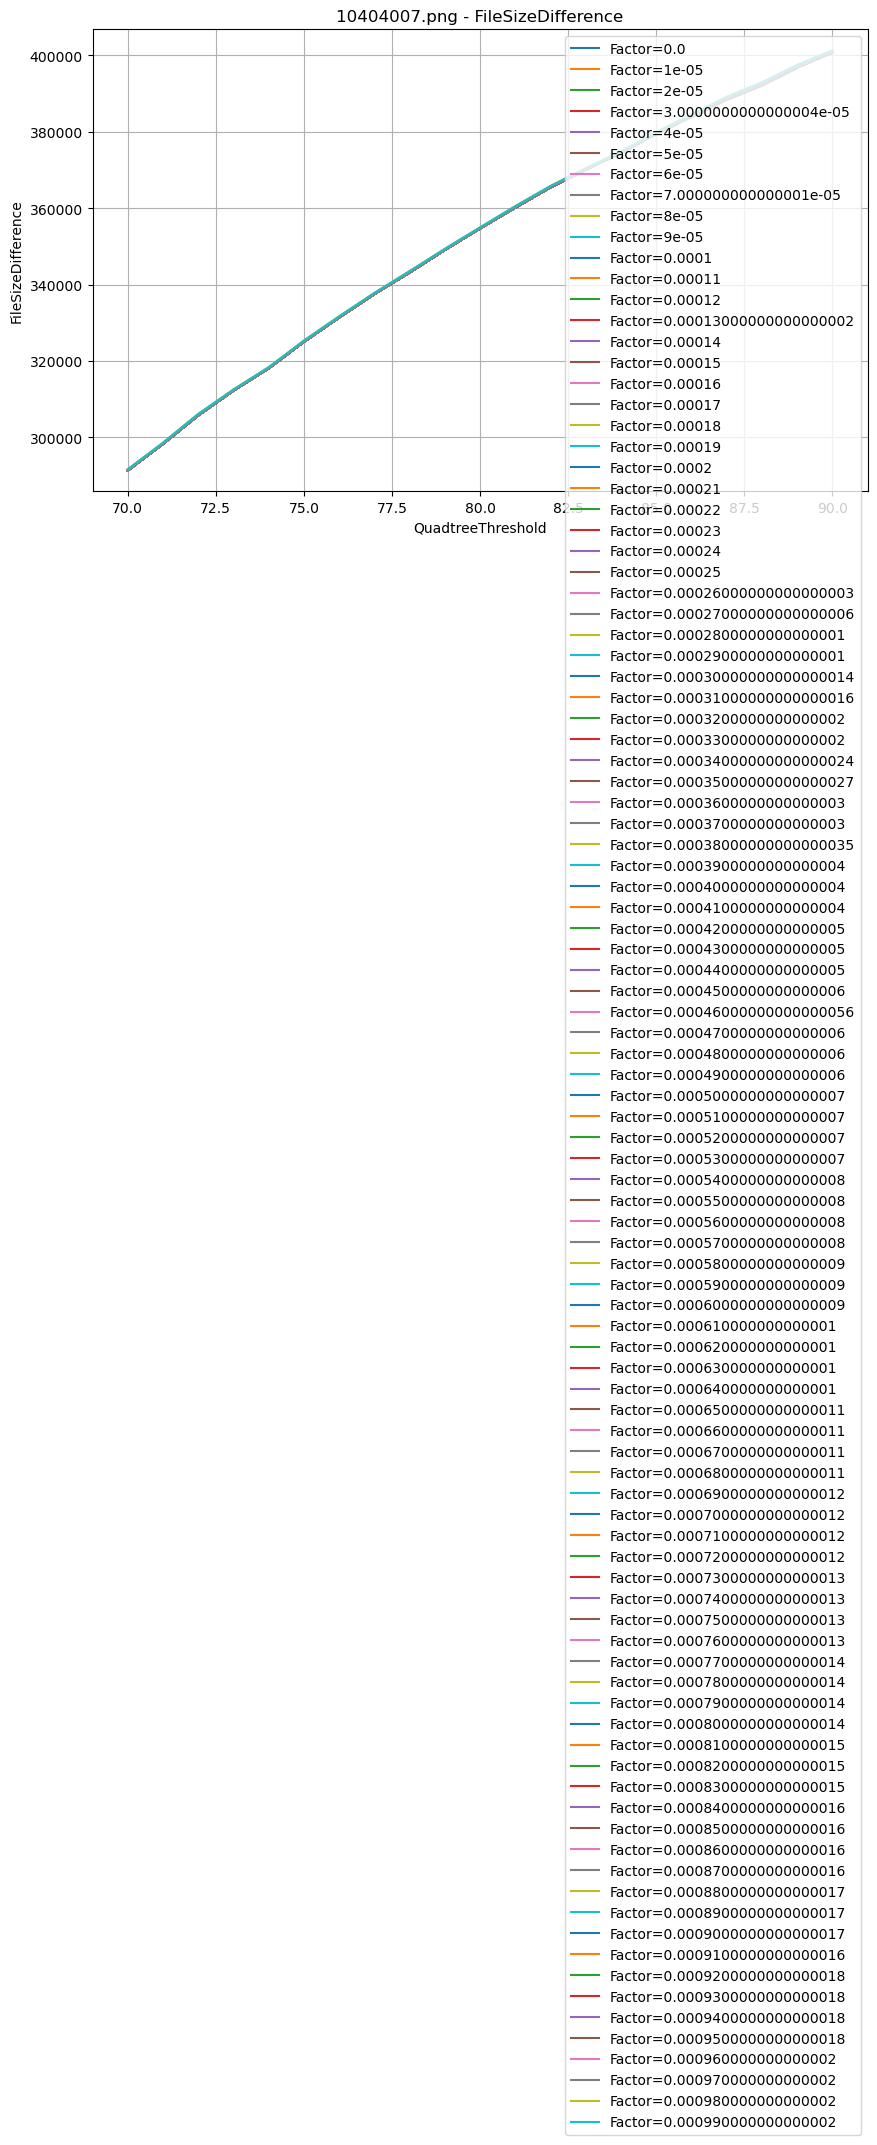

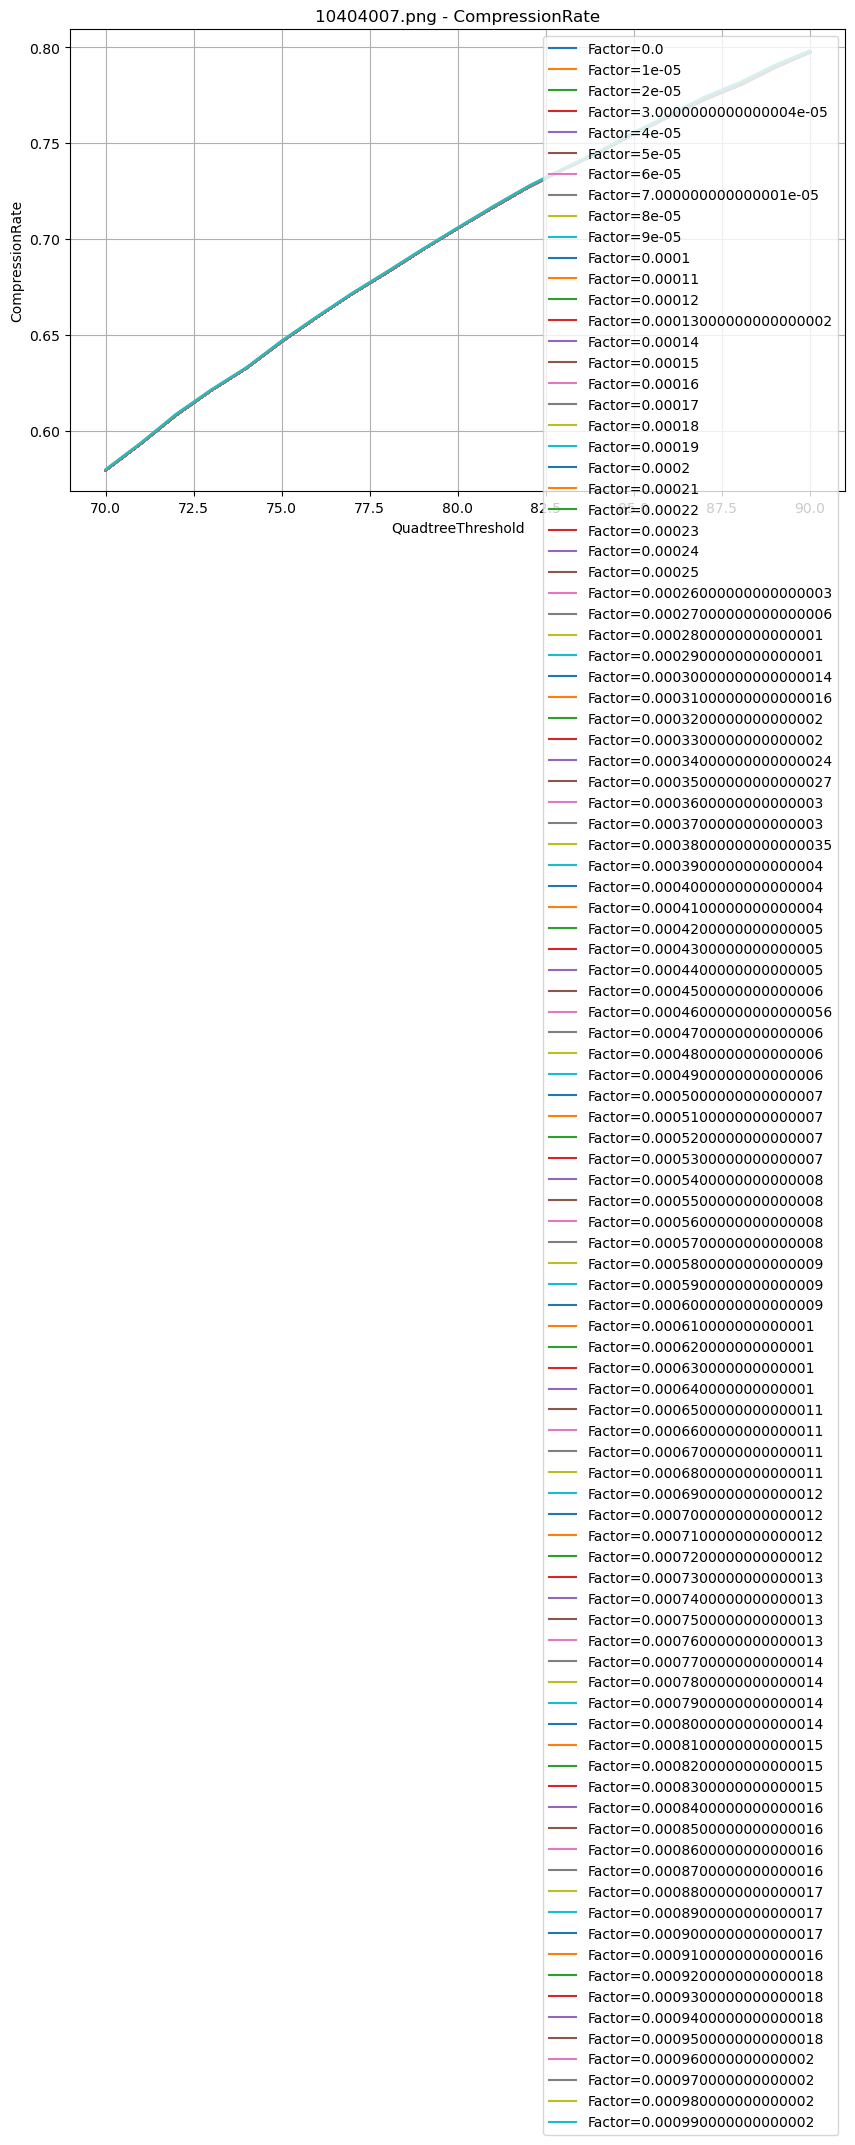

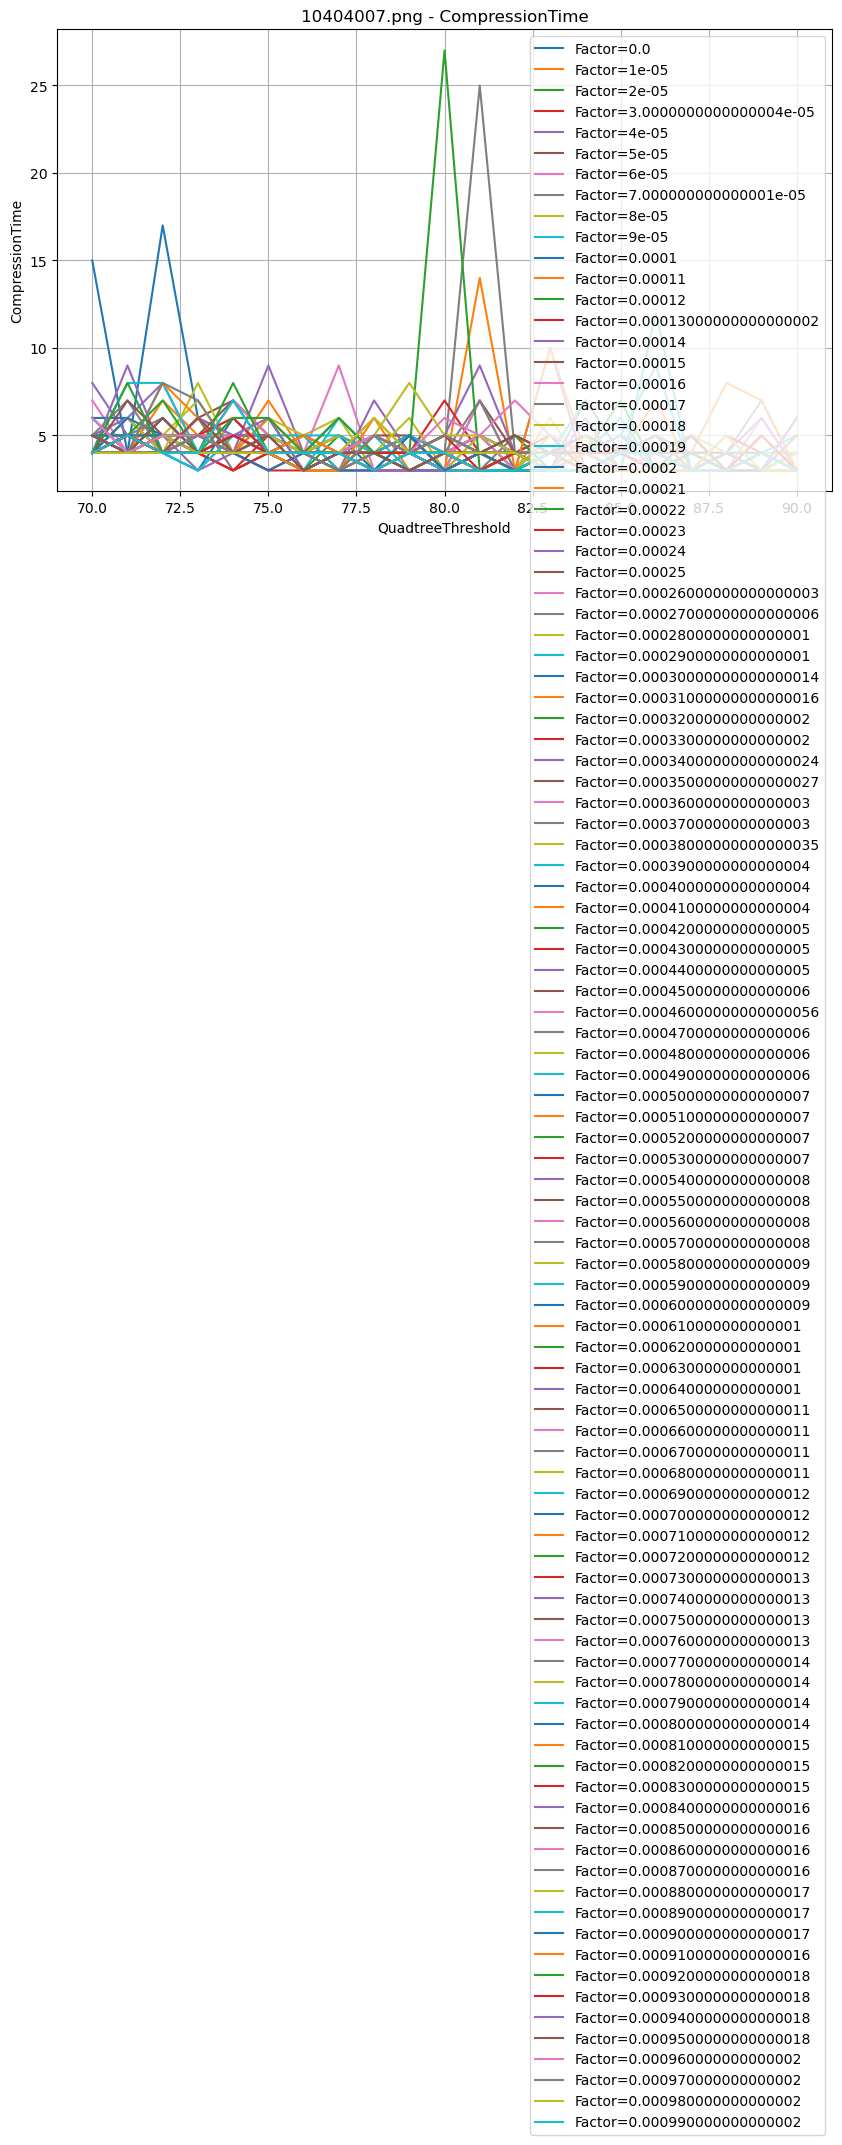

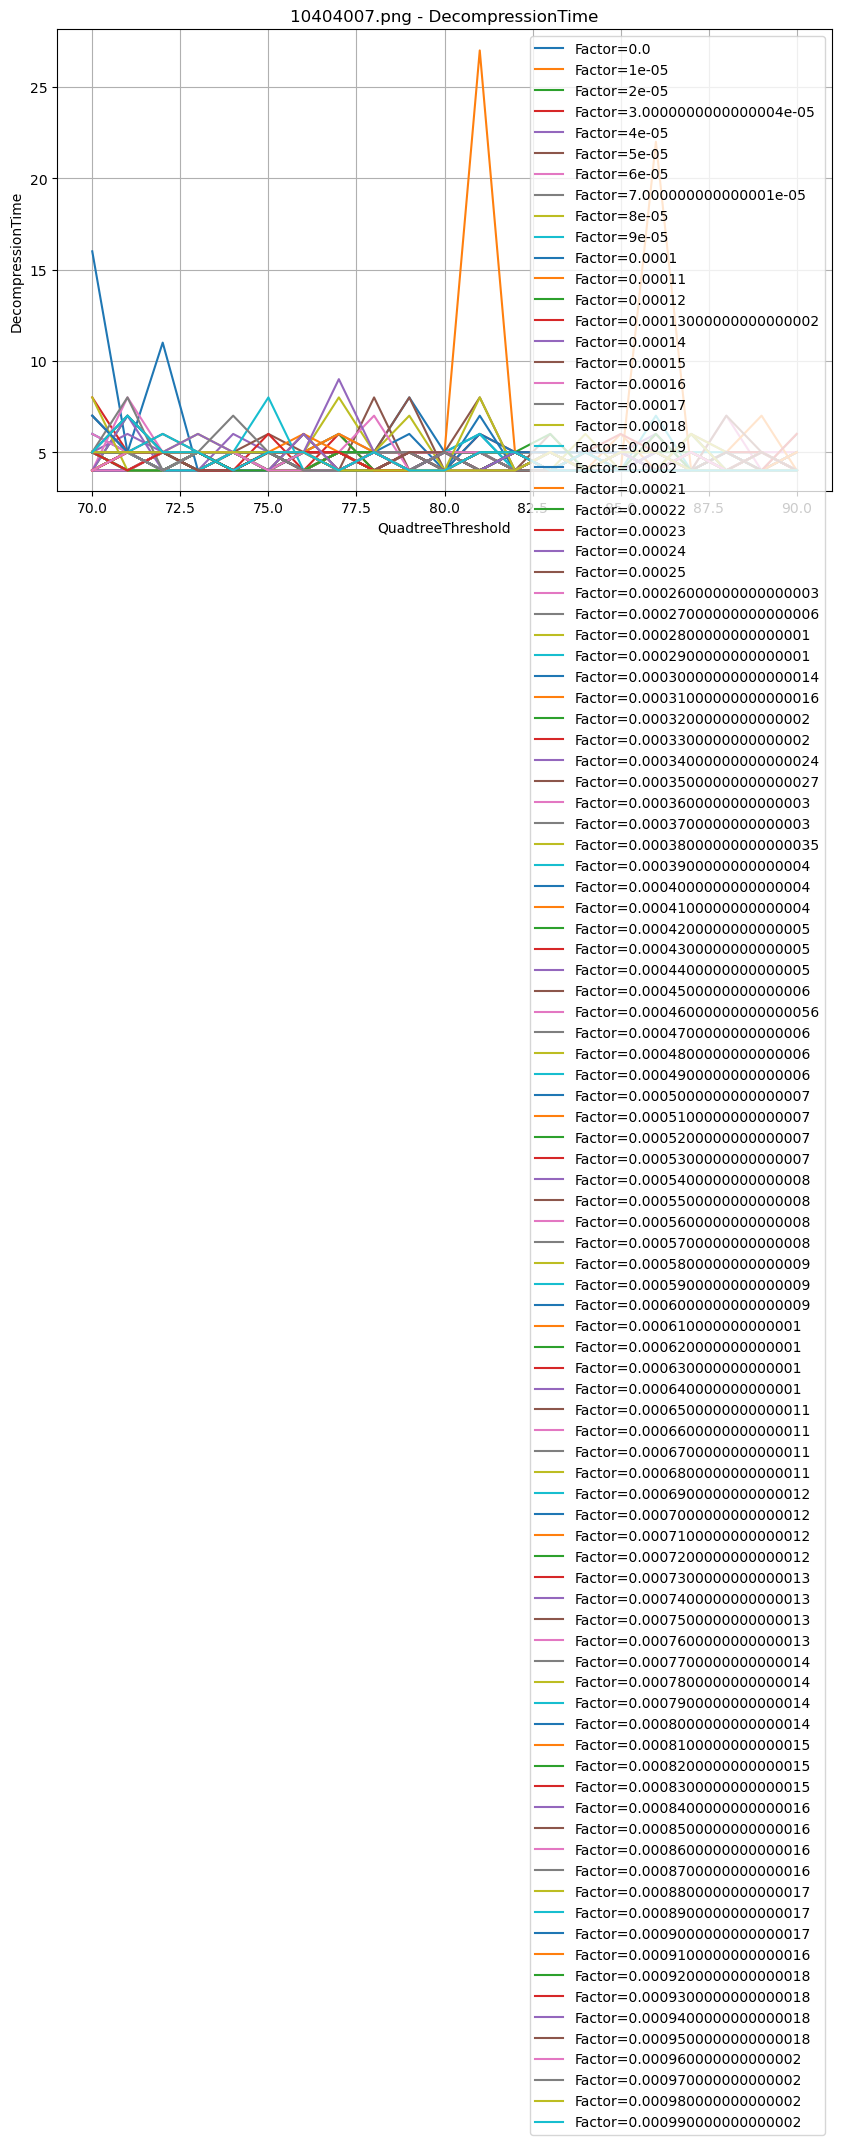

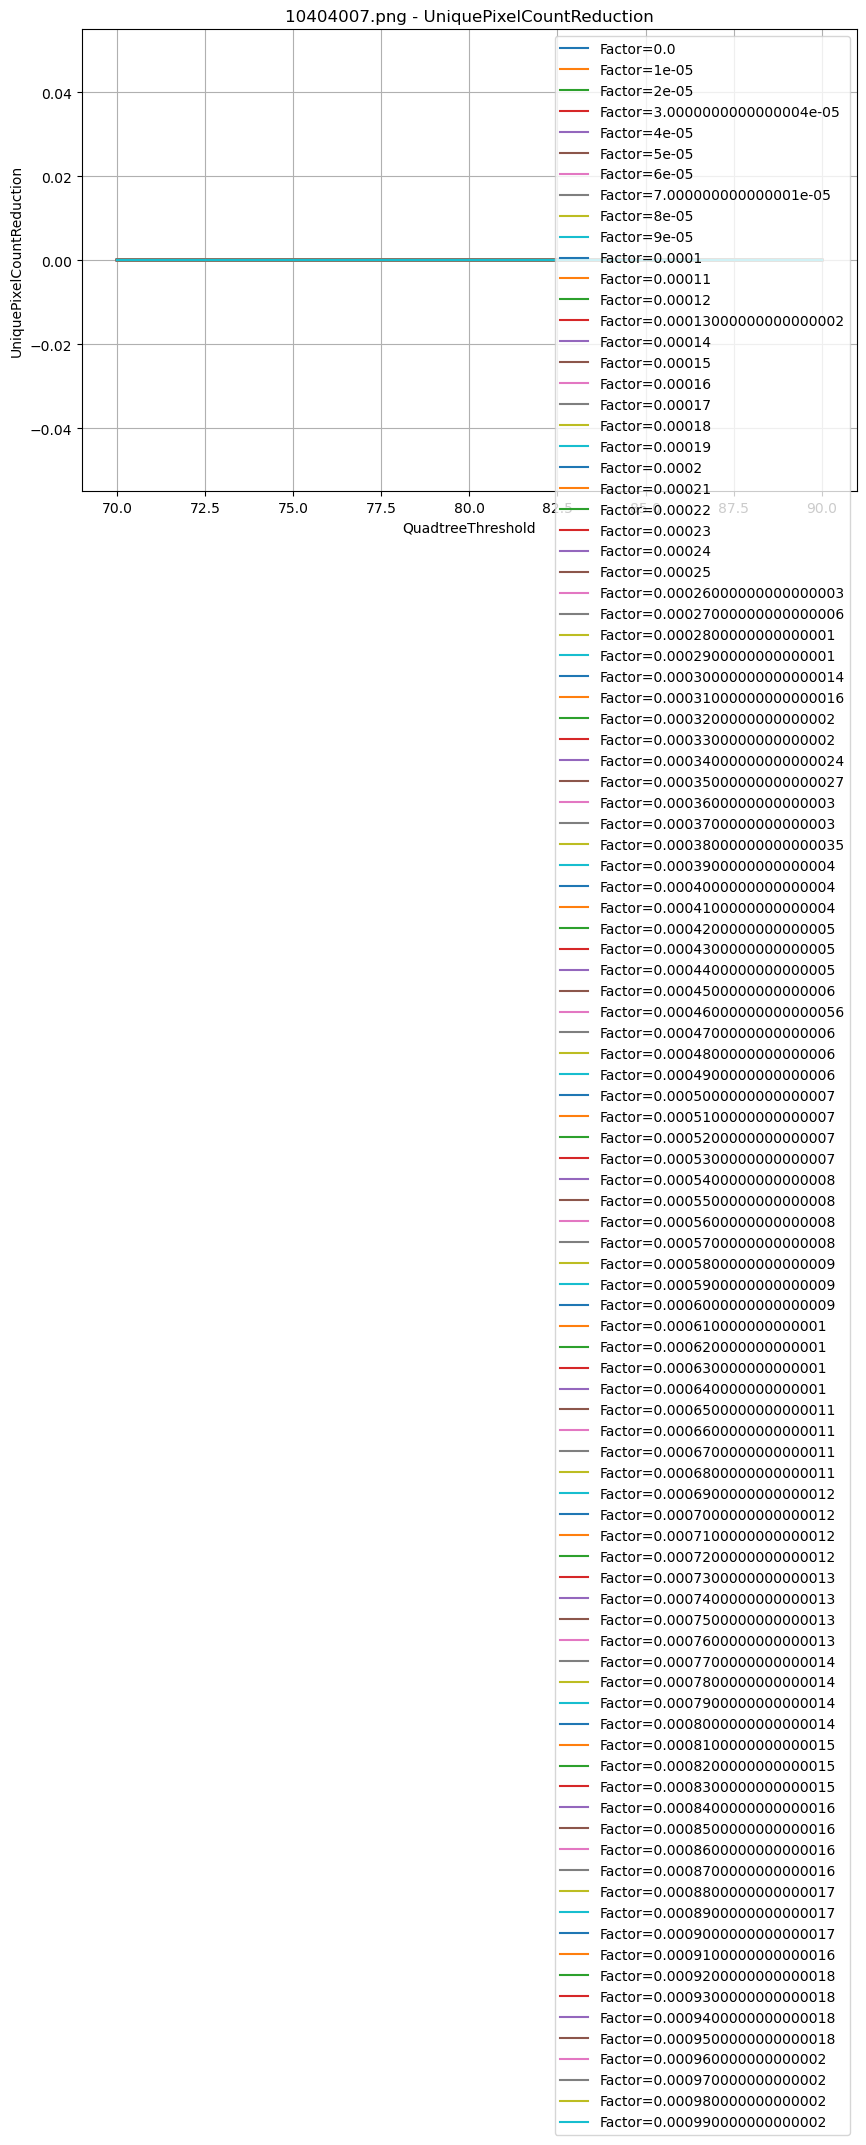

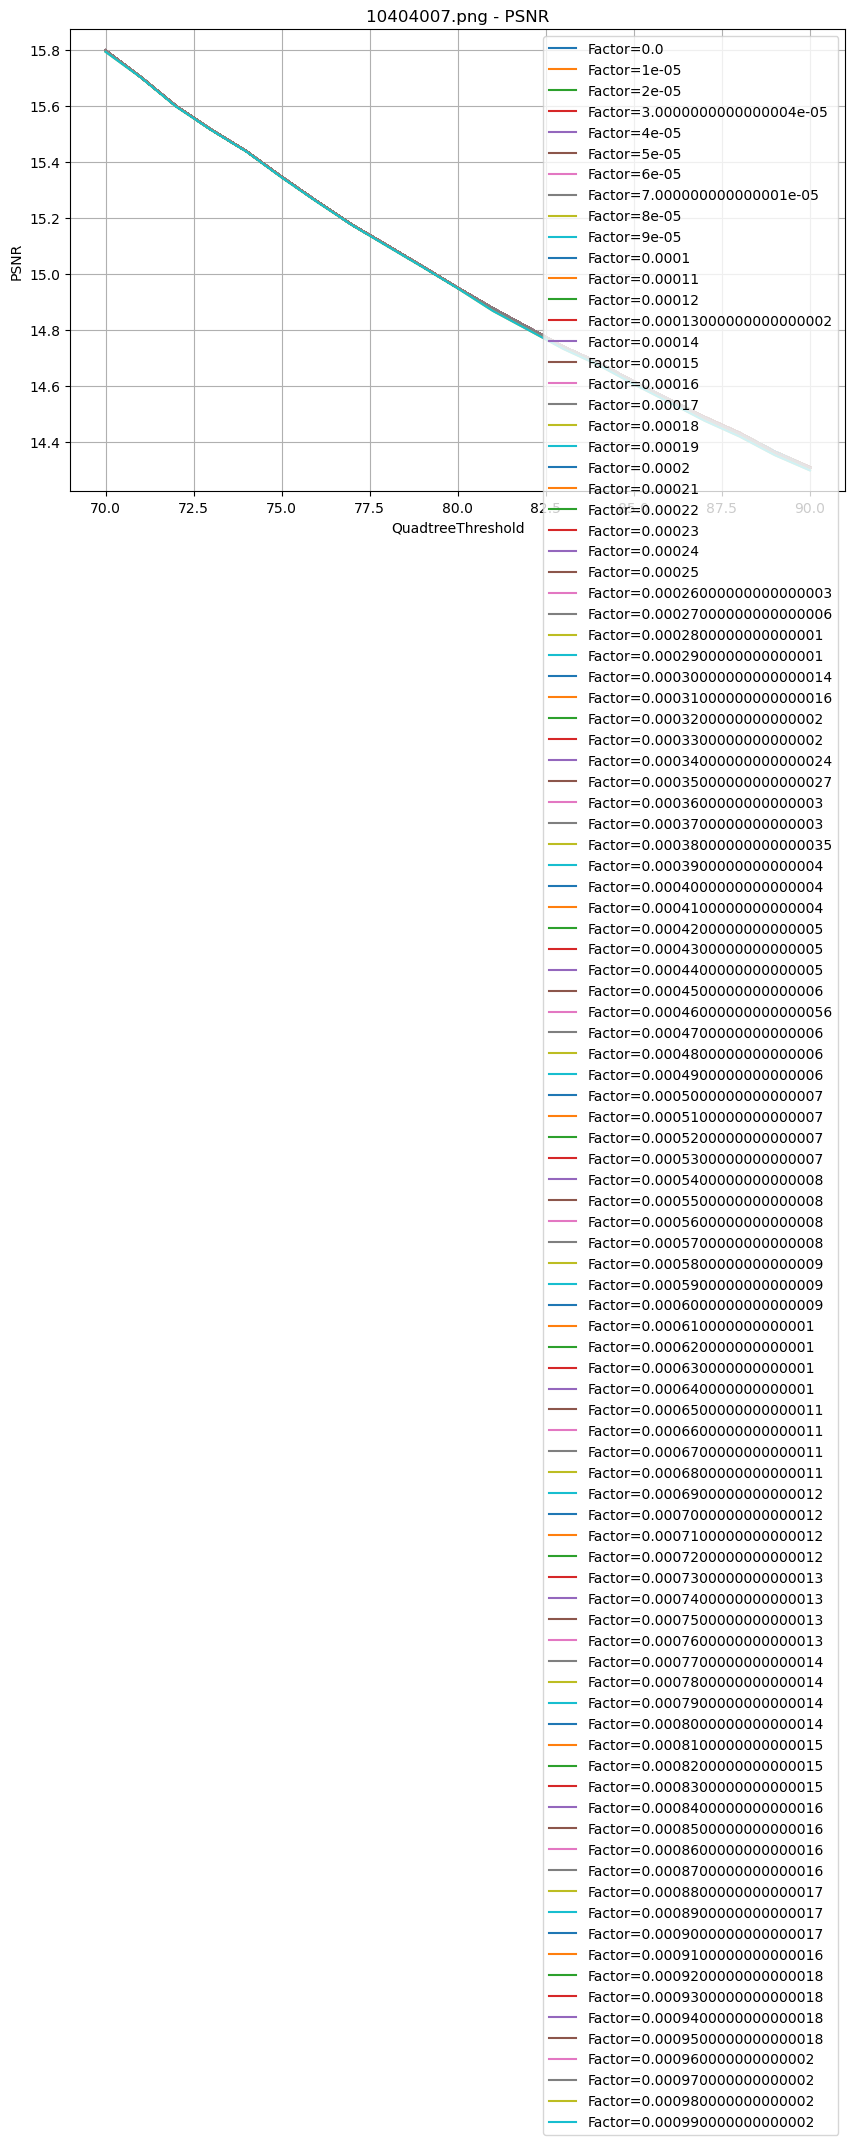

In [5]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [6]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_21231/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [7]:
data_grouped_by_test

TestID  QuadtreeThreshold  \
0     test_20231102_191808                 70   
1     test_20231102_191809                 70   
2     test_20231102_191809                 70   
3     test_20231102_191810                 70   
4     test_20231102_191810                 70   
...                    ...                ...   
2095  test_20231102_193556                 90   
2096  test_20231102_193557                 90   
2097  test_20231102_193557                 90   
2098  test_20231102_193558                 90   
2099  test_20231102_193558                 90   

      AllowedExceedingThresholdFactor   SN  OriginalFileSize  \
0                             0.00000  5.5          321053.7   
1                             0.00001  5.5          321053.7   
2                             0.00002  5.5          321053.7   
3                             0.00003  5.5          321053.7   
4                             0.00004  5.5          321053.7   
...                               ...  ...               ...   
2095                          0.00095  5.5          321053.7   
2096                          0.00096  5.5          321053.7   
2097                          0.00097  5.5          321053.7   
2098                          0.00098  5.5          321053.7   
2099                          0.00099  5.5          321053.7   

      CompressedBinSize  FileSizeDifference  CompressionRate  CompressionTime  \
0              103398.2            217655.5         0.719210              4.8   
1              103398.2            217655.5         0.719210              3.2   
2              103398.2            217655.5         0.719210              3.0   
3              103398.2            217655.5         0.719210              3.4   
4              103398.2            217655.5         0.719210              2.8   
...                 ...                 ...              ...              ...   
2095            65187.6            255866.1         0.822350              2.8   
2096            65187.6            255866.1         0.822350              2.4   
2097            65187.6            255866.1         0.822350              2.6   
2098            64948.4            256105.3         0.823053              2.8   
2099            64948.4            256105.3         0.823053              3.3   

      DecompressionTime  UniquePixelCountBefore  UniquePixelCountAfter  \
0                   5.9                     0.0                    0.0   
1                   4.2                     0.0                    0.0   
2                   3.9                     0.0                    0.0   
3                   4.1                     0.0                    0.0   
4                   4.2                     0.0                    0.0   
...                 ...                     ...                    ...   
2095                3.9                     0.0                    0.0   
2096                4.3                     0.0                    0.0   
2097                3.6                     0.0                    0.0   
2098                3.6                     0.0                    0.0   
2099                3.8                     0.0                    0.0   

      UniquePixelCountReduction  UniquePixelCountReductionRate        MAE  \
0                           0.0                            0.0  10.986970   
1                           0.0                            0.0  10.986970   
2                           0.0                            0.0  10.986970   
3                           0.0                            0.0  10.986970   
4                           0.0                            0.0  10.986970   
...                         ...                            ...        ...   
2095                        0.0                            0.0  13.951849   
2096                        0.0                            0.0  13.951849   
2097                        0.0                            0.0  13.951849   
2098                        0.

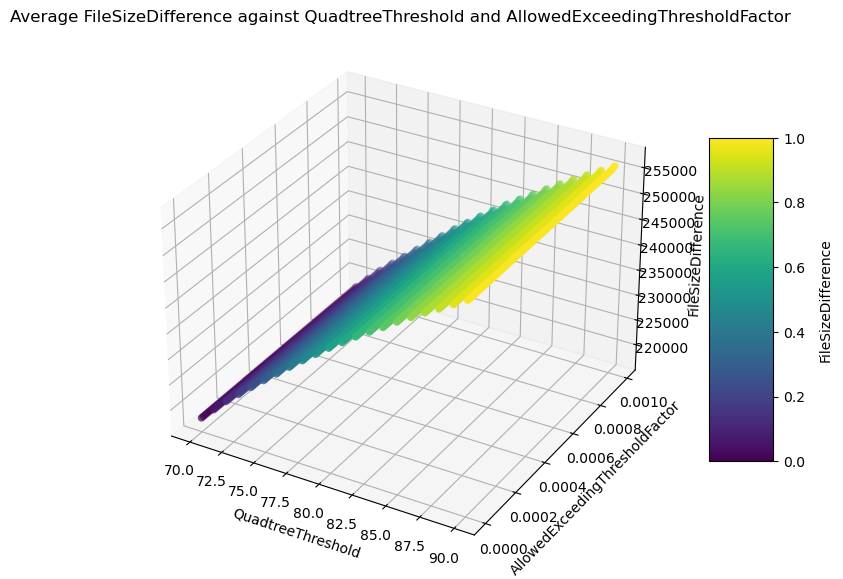

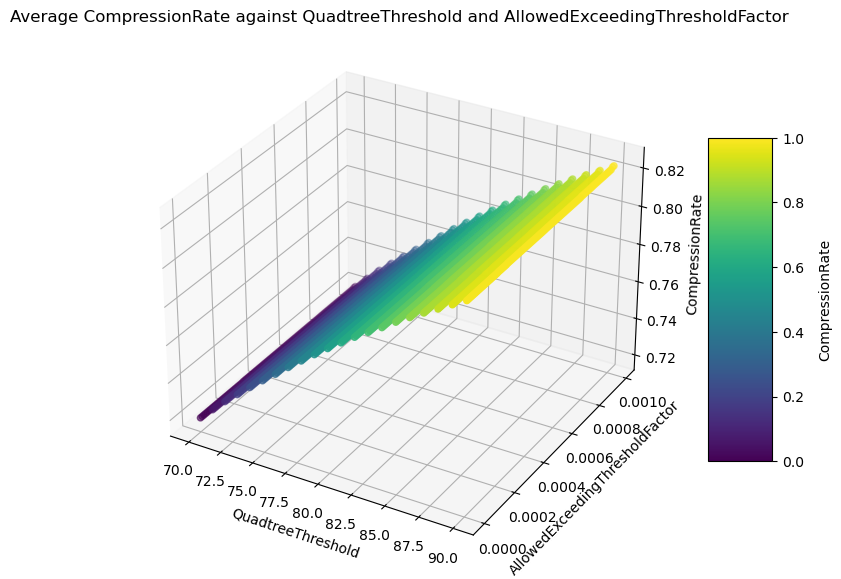

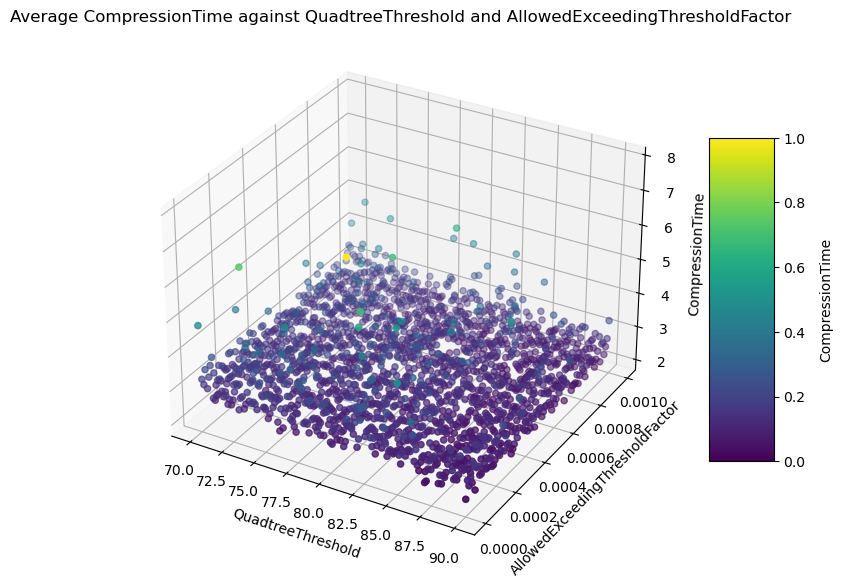

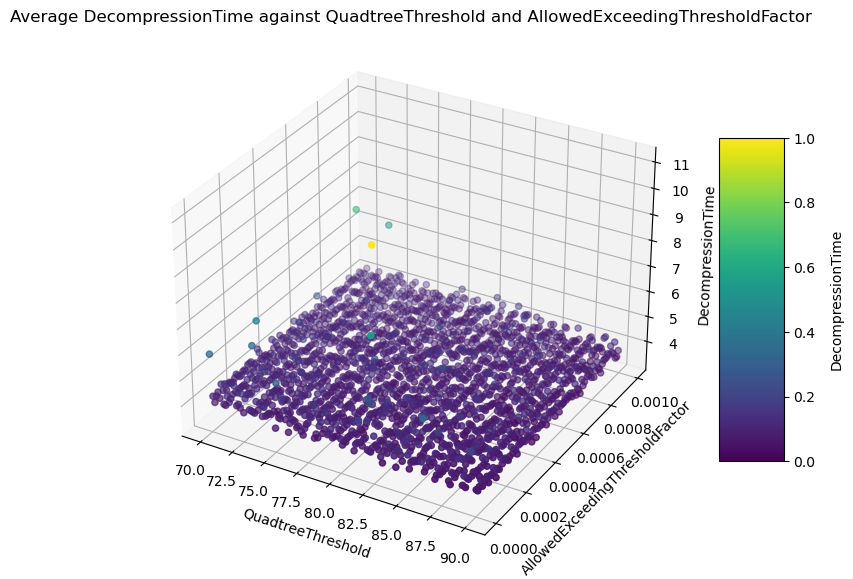

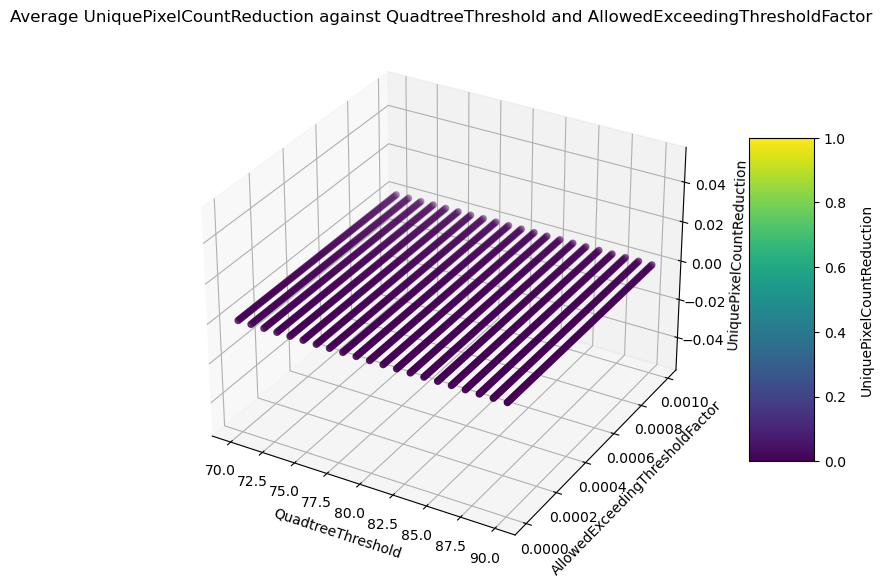

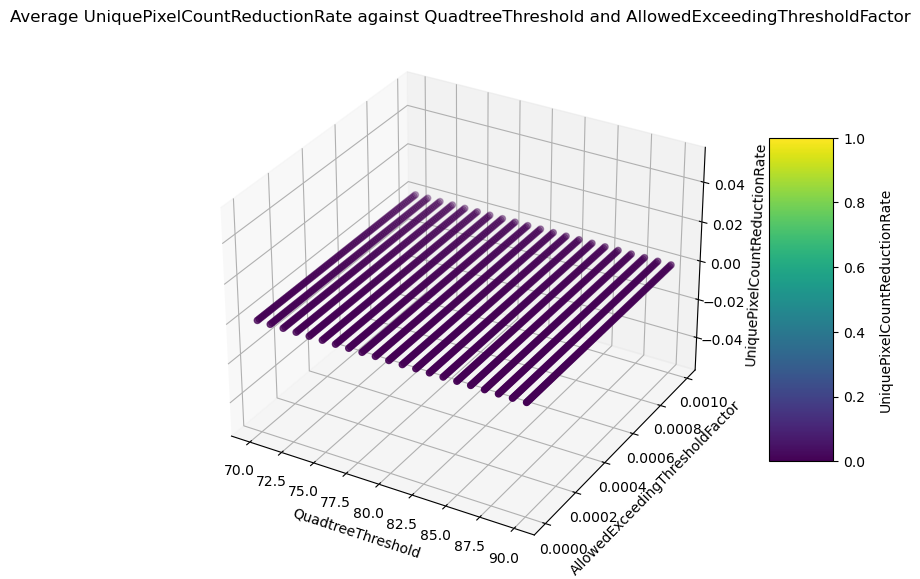

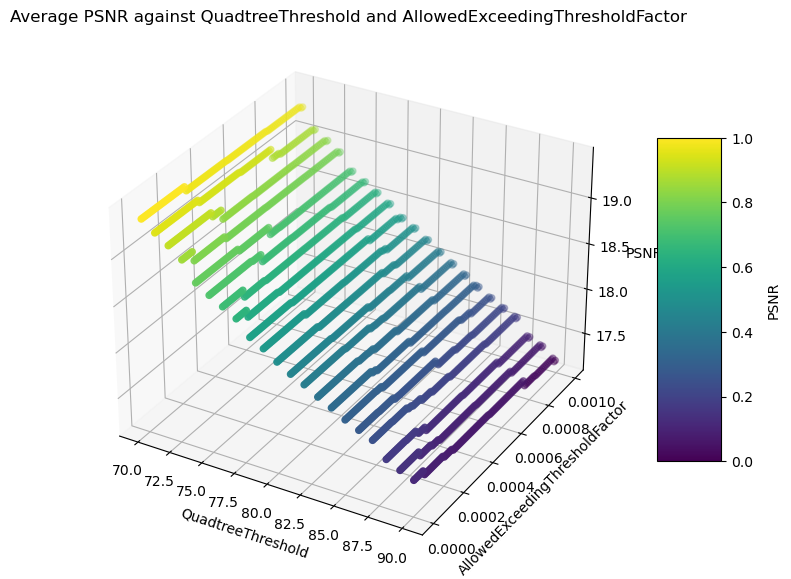

In [8]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


In [9]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [10]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

In [11]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

In [12]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [13]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


    QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
9                  70                          0.00009  0.580848
12                 70                          0.00012  0.577924
2                  70                          0.00002  0.572076
